# ML Model Blueprint

<b>There are two main objectives in the given task:
1. Customer segmentation based on browsing behaviour
2. Target those segmented customers for effective cross selling of products</b>

For this task, I want to complete both the objectives with a single algorithm. Hence, I am proposing a single unsupervised ML model that can fulfill both the objectives at the same time. As the output of the model, it will segment customers based on the two objectives, that is, their browsing behaviour and whether that customer can be a candidate for cross selling or not.

Based on the features of the UCI Online Retail dataset, I feel like unsupervised ML algorithm is the way to go for customer segmentation as there is no direct labelled features to categorize the customers by. However, since I am doing the clustering based on two objectives simultaneously, the selection of features is very important. <br>

<b>Why unsupervised ML algorithm?</b><br>
In this task, the goal is unsupervised. We need to segment custom groups into some sort of structure based on their behaviour as well as identify the cross selling opportunity in the customer segments. So, as there are no clear and straight forward target labels in our dataset to segment customers based on the two aforementioned objectives, I am using unsupervised ML algorithm.


# Additional Feature Engineering for ML Modeling

The ML algorithm that I used is called K Prototype. It is an unsupervised clustering algorithm that will help to generate different customer clusters based on the features and thus perform customer segmentation based on both the customer behaviour as well as the cross selling opportunity.

<b> Why use Clustering technique? </b> <br>
In business analytics, clustering has widespread application as it helps to group observations of similar kinds into smaller groups within the larger population. One major problem every business faces is to organize huge data into meaningful insights. Clustering techniques are handy in such situation.





### *RFMPCG - A modified RFM analysis specifically to fulfill the objectives of this task*

To complete the given business objective, it is needed to segment customers based on browsing behaviour as well as identify customer segments for effective cross selling. One of the most popular, easy-to-use, and effective segmentation methods to enable marketers to analyze customer behavior is RFM analysis. The three metrics in RFM analysis are Recency, Frequency and Monetary Value. So, it is a common practice to design unsupervised ML models based on the RFM metrics for customer segmentation. <br>
However, for the task in our hand, I want to design an integrated model that can categorize customer segments not only based on their browsing behaviour but also considering the cross selling opportunity more precisely. Moreover, both the tasks at hand are interrelated and have many common features for which idea of designing such a model is reasonable. However, for our model, only the RFM metrics are not enough to get the clarity in information and segment customers based on those two perspective.<br>

For this reason, a modified RFM analysis is proposed to bring clarity into the information for effective use of this algoithm in customer segmentation. Based on the given dataset for the task and our objectives, the features chosen in addition to RFM are Geography, Product Variety and Cancelled Order. After analyzing the dataset in great detail, I found these three additional features to be complimentary for our purpose of both analyzing customer behaviour as well cross selling scopes. This analysis method is termed as RFMPCG. The feature engineering steps are performed accordingly where the use of the features are justified as well.


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("cleaned_dataset.csv")
df.shape

(404780, 11)

### *Monetary Value*
Monetary value of the transaction helps us understand what the size of the customer's wallet is and their purchasing power. In addition, it is an important feature to analyzing both upsale and cross sale scopes as customers with higher purchase capability may avail the opportunity if we try to cross sell to them. The average amount spent by each customer is taken as the monetary value in our case.

In [4]:
cus_data = df.groupby('CustomerID')[['TotalPrice']].mean() # Average amount spent
cus_data.rename(columns={'TotalPrice':'Monetary'},inplace=True)
cus_data.head()

,Monetary
CustomerID,
12347.0,25.239670
12348.0,55.542222
12349.0,20.152083
12350.0,17.537500
12352.0,17.779405


### *Frequency*
Frequency is important as we get to know how active the customer is, which in turn partly explains the browsing behavior. Moreover, the more active and frequent a customer is, the more loyal he/she is to. The frequency is calculated from the number of Invoice count for each customer.

In [5]:
cus_data['Frequency'] = df.groupby('CustomerID')['InvoiceNo'].count()
cus_data.head()

,Monetary,Frequency
CustomerID,,
12347.0,25.239670,182
12348.0,55.542222,27
12349.0,20.152083,72
12350.0,17.537500,16
12352.0,17.779405,84


### *Recency*
Recency of the purchase indicates whether a customer is active, dormant, or churned. Based on their browsing behaviour, the recency metric of the customers can also be inferred proving to be vital for our customer segmentation. The recency value is extracted from the InvoiceDate in the following way by substracting the date of transaction from the most recent InvoiceDate.

In [6]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
max_date = max(df['InvoiceDate'])
df['diff'] = max_date - df['InvoiceDate']


In [7]:
import datetime as dt
cus_data['Recency'] = df.groupby('CustomerID')['diff'].min().dt.days
cus_data = cus_data.reset_index()
cus_data.head()

,CustomerID,Monetary,Frequency,Recency
0,12347.0,25.239670,182,1
1,12348.0,55.542222,27,74
2,12349.0,20.152083,72,18
3,12350.0,17.537500,16,309
4,12352.0,17.779405,84,35


### *Product Variety*
Product variety can help explain customers' willingness to explore. This is related to browsing behavior as well and indicates the number of products a customer seeks to buy from the store. More importantly, this is a vital feature to analyze the cross selling opportunities for the customers. This is becauses people who tend to buy variety of products can be the most suitable candidates providing they have enough money and loyalty to the business.

In [8]:
cus_data['ProductVariety']=df.groupby('CustomerID')['Description'].transform(lambda x:x.nunique())


### *CancellationRate*
From the analysis of data done earlier, I found that there is a significant amount of orders that have been cancelled. One approach could have been to drop these transactions as it did not generate any revenue for the company. However, almost all the cancelled transactions are from UK where 90% of the transactions have taken place. So, in another perspective, these cancelled transaction can help the business identify the nature of the unreliable customers. Moreover, some of these customers if targetted by proper marketing techniques may become future potential customers for the company to look for. Because of these reasons, this categorical feature is considered in our customer segmentation analysis.

In [9]:
cus_data['CancellationRate']=df.groupby('CustomerID')['CancelledOrder'].transform(lambda x:x.mode()[0])

### *Geography*
The customer behaviour and cross selling scopes both may vary based on geography. Moreover, there is a huge imbalance between home and international transactions in the dataset. K Prototype algorithm suffers greatly in case of data imbalance. So, it is better to segment the international customers seperately and not on the basis of UK customers. As a result, this feature is not directly considered while implementing our ML model. Based on geography, I seperated the transactions into home and abroad at first and then use the rest of the other features directly in our ML algorithm for customer segmentation.


In [10]:
cus_data['Place']= df['Place']


In [11]:
cus_data.to_csv('final.csv', index = False)

# ML Model Implementation

# K Prototype
In K Prototype algorithm, data points are allocated to the cluster that has the most similar looking reference point. It attempts to find the dissimilarity between data points and then groups the points with less dissimilarity into a cluster. One key highlight of this algorithm is that it can be used for both numerical and categorical features in a dataset. It also works very fast.

<b> Why not K Means Clustering Algorithm? </b> <br>
KMeans Clustering is works very great when the features are only continuous variables. For example, if I only did RFM analysis, I could have used KMeans. Since I want to design an algorithm based on RFMPCG analysis, that takes account of both my objective functions, I am unable to use KMeans. Because my RFMPCG metric contains both numerical as well as categorical features. The reason is K-means uses Euclidean distance to measure the similarity of objects and there aren’t Euclidean distances between data segmented by categorical features. <br>

One key highlight of K Prototype algorithm is that it can be used for both numerical and categorical features in a dataset. It also works very fast. The dissimilarity measure for numeric attributes is the square Euclidean distance whereas the similarity measure on categorical attributes is the number of matching attributes between objects and cluster prototypes. The algorithm has the following 3 steps:
1. Initial prototype selection : I selected the Cao approach. It selects the prototypes based on the density of the data point and the dissimilarity value
2. Initial allocation
3. Re-allocation

The initial prototype selection is done for all the data points. This keeps on repeating until there is no re-allocation of data points needed.





***At first based on geography, the final features are seperated. It is because there is huge imbalance in the dataset in terms of geography. Most of the customers are from UK. K Prototype algorithm is hugely affected by imbalanced dataset like other clustering algorithms. To solve this issue, I am making a seperate customer segmentation for home country and another one for all the abroad countries. Moreover, this will also make the customer segmentation more precise according to our needs.*** 

### Domestic Customer Segmentation

In [12]:
#importing necessary libraries and the dataset
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import StandardScaler
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score
import matplotlib.patches as mpatch

In [13]:
cus_data = pd.read_csv('final.csv')
cus_data['Place']= df['Place']
cus_data = cus_data[cus_data['Place'] == 'Home']
cus_data.nunique()

CustomerID          4160
Monetary            4115
Frequency            458
Recency              347
ProductVariety       123
CancellationRate       2
Place                  1
dtype: int64

In [14]:
cus_data.drop(["Place"], axis = 1, inplace = True)
cus_data.head()

,CustomerID,Monetary,Frequency,Recency,ProductVariety,CancellationRate
0,12347.0,25.239670,182,1,24,0
1,12348.0,55.542222,27,74,24,0
2,12349.0,20.152083,72,18,24,0
3,12350.0,17.537500,16,309,24,0
4,12352.0,17.779405,84,35,24,0


***Here, only the numerical features are scaled in order to avoid the negative effects of feature magnitudes and also speed up the process. Rest of the other preprocessing steps have been performed earlier.***

In [15]:
Scaler = StandardScaler()
cus_data.iloc[:,1:5] = Scaler.fit_transform(cus_data.iloc[:,1:5]) #only numerical values
syms = cus_data.iloc[:,0].values.astype(str)
X = cus_data.iloc[:,1:].values.astype(object)

In [253]:
X

array([[0.0569643260137559, 1.0180629897630806, -1.3600756790338595,
        -0.906346776626451, 0.0],
       [1.0109586304126326, -0.40230362283996857, 0.114500079050101,
        -0.906346776626451, 0.0],
       [-0.07046554784352427, 0.12072525153459863, -0.7311208288472313,
        -0.906346776626451, 0.0],
       ...,
       [-0.342460538426005, -0.7540733291878386, -1.040859531094062,
        0.46670258577396884, 0.0],
       [-1.0546140296724633, 3.528715415778481, -1.2180843360421945,
        0.46670258577396884, 0.0],
       [0.1461288309344717, 0.09944906135177584, -0.2970104869600315,
        0.46670258577396884, 0.0]], dtype=object)

### *Finding the optimal value for K to select no. of clusters*
To check the optimal number of clusters, I have checked the following:


1. Silhoutte Score: It is a metric used to calculate the goodness of a clustering technique. The value of this score ranges from -1 to 1.  This score is calculated using the mean intra-cluster distance and the mean nearest-cluster distance for each sample. The more positive the silhoutte score, the better the clustering. 

In [16]:

#finding the optimal cluster_number k
for n in range(2,8):
    kproto = KPrototypes(n_clusters = n, init = 'Cao')
    clusters = kproto.fit_predict(X, categorical = [4])
    silhouette = silhouette_score(X[:,:4],clusters)
    print('number of clusters:', n)
    print('  cost: ',kproto.cost_)
    print('  average silhouette score: ',silhouette)

number of clusters: 2
  cost:  13222.063404332192
  average silhouette score:  0.45709488561467077
number of clusters: 3
  cost:  10309.50008745059
  average silhouette score:  0.5002906721928431
number of clusters: 4
  cost:  8132.789274812967
  average silhouette score:  0.5062079255757251
number of clusters: 5
  cost:  6546.916731302087
  average silhouette score:  0.5115216853672968
number of clusters: 6
  cost:  5489.81013362881
  average silhouette score:  0.3542827783461176
number of clusters: 7
  cost:  4475.387543619727
  average silhouette score:  0.4158600414529169


2. Elbow Plot: The Elbow Plot is another way of finding the optimal value of clusters. The elbow plot is calculated between the cost and cluster number (k). Here, the cost is a combined similarity measure for both numeric and categorical variables calculated between the objects and the cluster prototypes as K Prototype contains both types of variables. This calculation helps to come to the optimal number of clusters.

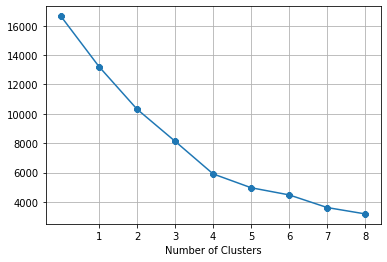

In [20]:
cost = []
for num_clusters in list(range(1,10)):
    kproto = KPrototypes(n_clusters = num_clusters, init = 'Cao')
    kproto.fit_predict(X, categorical = [4])
    cost.append(kproto.cost_)
    
plt.plot(cost, marker = '8')
plt.grid()
plt.xlabel("Number of Clusters")
plt.xticks(np.arange(1,9,1))
plt.show()

Based on both these techniques, I found that clusters number 4 or 5 are suitable in our case for customer segmentation. Even though the silhoutte score for 5 clusters is the best, when running the algorithm with clusters =5, it did not give any additional insights about the data compared to running the algorithm with clusters = 4. 

In [44]:
#clustering with kprototypes with k = 4
kproto = KPrototypes(n_clusters = 4, init = 'Cao')
clusters = kproto.fit_predict(X, categorical = [4])
print('Cluster Centers:\n', kproto.cluster_centroids_)

Cluster Centers:
 [[-2.32954195e-02  6.82544499e-02 -5.12318056e-01 -1.35381142e-01
   0.00000000e+00]
 [-6.17712263e-02  3.54586493e-02 -5.73102852e-02  5.19552926e+00
   0.00000000e+00]
 [ 7.69074555e-02 -2.89262086e-01  1.54420781e+00 -1.51144385e-01
   0.00000000e+00]
 [-1.70355509e-01  2.73241496e+01 -8.98460677e-01  1.00308313e+00
   0.00000000e+00]]


In [35]:
#scaling back to original values and retrieving all attributes
Clustered = pd.DataFrame(data=Scaler.inverse_transform(cus_data.iloc[:,1:5]),columns=['Monetary', 'Frequency', 'Recency', 'ProductVariety'])
#Clustered['Place'] = X[:,4]
Clustered['CancellationRate'] = X[:,4]
Clustered['CustomerID'] = syms
Clustered['Cluster'] = clusters
Clustered.groupby(['Cluster', 'CancellationRate']).count()['Frequency']
Clustered.groupby(['Cluster', 'CancellationRate']).mean()

Monetary    Frequency     Recency  ProductVariety
Cluster CancellationRate                                                    
0       0.0               42.177043    27.877734  246.292247      104.079523
        1.0               13.654493    24.600000  254.400000        5.600000
1       0.0               15.218044  4735.000000    0.200000      213.000000
2       0.0               26.489677    99.657407   84.972222     1153.962963
3       0.0               30.829081   104.932759   39.254720      107.842663
        1.0               28.434204   150.176471   43.764706        7.529412

In [36]:
Clustered.groupby(['Cluster', 'CancellationRate']).count()['Frequency']


Cluster  CancellationRate
0        0.0                 1006
         1.0                    5
1        0.0                    5
2        0.0                  108
3        0.0                 3019
         1.0                   17
Name: Frequency, dtype: int64

In [24]:
Clustered.tail(100)

,Monetary,Frequency,Recency,ProductVariety,CancellationRate,CustomerID,Cluster
4060,12.986652,221.0,12.0,166.0,0,18145.0,0
4061,16.035000,10.0,140.0,166.0,0,18146.0,3
4062,25.277143,7.0,45.0,166.0,0,18147.0,0
4063,38.255000,16.0,50.0,166.0,0,18149.0,0
4064,15.312973,37.0,31.0,166.0,0,18150.0,0
...,...,...,...,...,...,...,...
4155,18.075000,10.0,277.0,162.0,0,18280.0,3
4156,11.545714,7.0,180.0,162.0,0,18281.0,3
4157,11.850769,13.0,7.0,162.0,0,18282.0,0
4158,2.757109,754.0,3.0,162.0,0,18283.0,0


# *Model Evaluation & Remarks*

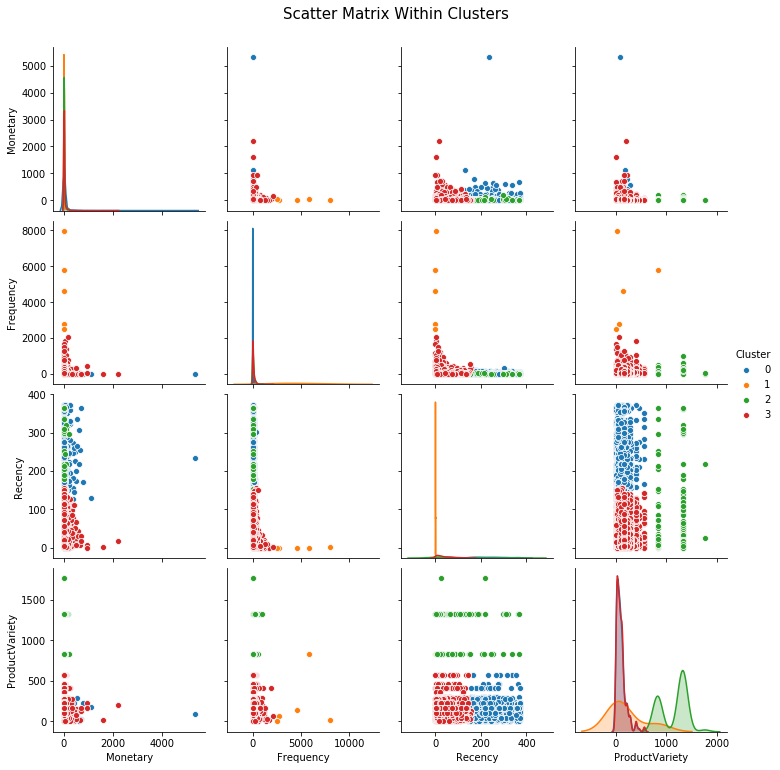

In [37]:
#comparison plots
sns.pairplot(Clustered.drop(columns=['CancellationRate','CustomerID']), hue='Cluster')
plt.suptitle('Scatter Matrix Within Clusters', fontsize = 15, y = 1.05)
plt.show()

K Prototype algorithms are usually evaluated based on elbow plot and silhoutte scores. The silhoutte score helps to decide the goodness of the clustering. Based on values suggested by elbow plot and silhoutte score and as well as running simulations for different number of clusters, I found that clusters equal to 4 or 5 are suitable in our case for customer segmentation. Even though the silhoutte score for 5 clusters is the best, when running the algorithm with clusters =5, it did not give any additional insights about the data compared to running the algorithm with clusters = 4. However, running with clusters = 4 helped to identify some outlier customers that were not identified with cluster = 3. So, the resulting conclusion is that for domestic customers, we will seperate customers into 4 categories keeping in mind both their behaviour and cross selling opportunity.

# Analysis of Domestic Customer Segments

![<caption>](c.JPG)


# Same Steps Repeated for International Customers

### International Customer Segmentation

***Another segmentation is performed only for international customers other than UK***

In [51]:
#cus_data['Place']= df['Place']
cus_data = pd.read_csv('final.csv')
cus_data['Place']= df['Place']

cus_data = cus_data[cus_data['Place'] == 'Abroad']
cus_data.nunique()

CustomerID          196
Monetary            196
Frequency           115
Recency             116
ProductVariety       14
CancellationRate      1
Place                 1
dtype: int64

In [52]:
cus_data.head()

,CustomerID,Monetary,Frequency,Recency,ProductVariety,CancellationRate,Place
26,12378.0,18.316256,219,129,114,0,Abroad
27,12379.0,20.471538,39,81,114,0,Abroad
28,12380.0,25.055842,101,21,114,0,Abroad
29,12381.0,17.657674,86,4,114,0,Abroad
30,12383.0,17.442632,95,184,114,0,Abroad


In [53]:
cus_data.drop("Place", axis = 1, inplace = True)

***Rest of the steps are as like before. Numerical features are scaled and silhoutte coefficients are obtained***

In [54]:
#scaling the numerical features for clustering
Scaler = StandardScaler()
cus_data.iloc[:,1:5] = Scaler.fit_transform(cus_data.iloc[:,1:5]) #only numerical values
syms = cus_data.iloc[:,0].values.astype(str)
X = cus_data.iloc[:,1:].values.astype(object)



#finding the optimal cluster_number k
for n in range(2,8):
    kproto = KPrototypes(n_clusters = n, init = 'Cao')
    clusters = kproto.fit_predict(X, categorical = [4])
    silhouette = silhouette_score(X[:,:4],clusters)
    print('number of clusters:', n)
    print('  cost: ',kproto.cost_)
    print('  average silhouette score: ',silhouette)

number of clusters: 2
  cost:  593.1904384864591
  average silhouette score:  0.5582841929577947
number of clusters: 3
  cost:  430.6639377225505
  average silhouette score:  0.573641612545377
number of clusters: 4
  cost:  296.0035825555282
  average silhouette score:  0.5273865503521059
number of clusters: 5
  cost:  151.791861392701
  average silhouette score:  0.5648509914842175
number of clusters: 6
  cost:  129.09175703825656
  average silhouette score:  0.5316094644608413
number of clusters: 7
  cost:  107.38376704329593
  average silhouette score:  0.5392957677780632


***Elbow Plot***

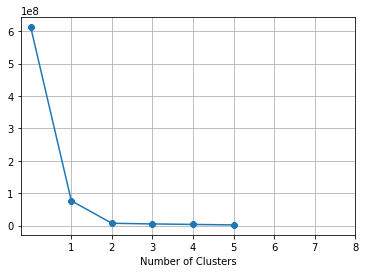

In [55]:
cost = []
for num_clusters in list(range(1,7)):
    kproto = KPrototypes(n_clusters = num_clusters, init = 'Cao')
    kproto.fit_predict(cus_data, categorical = [4])
    cost.append(kproto.cost_)
    
plt.plot(cost, marker = '8')
plt.grid()
plt.xlabel("Number of Clusters")
plt.xticks(np.arange(1,9,1))
plt.show()

In [67]:
#clustering with kprototypes with k = 2
kproto = KPrototypes(n_clusters = 2, init = 'Cao')
clusters = kproto.fit_predict(X, categorical = [4])
print('Cluster Centers:\n', kproto.cluster_centroids_)

Cluster Centers:
 [[ 0.01969023  0.01511732 -0.03944968 -0.33859956  0.        ]
 [-0.16408526 -0.1259777   0.32874731  2.82166303  0.        ]]


In [57]:
#scaling back to original values and retrieving all attributes
Clustered = pd.DataFrame(data=Scaler.inverse_transform(cus_data.iloc[:,1:5]),columns=['Monetary', 'Frequency', 'Recency', 'ProductVariety'])
#Clustered['Place'] = X[:,4]
Clustered['CancellationRate'] = X[:,4]
Clustered['CustomerID'] = syms
Clustered['Cluster'] = clusters
Clustered.groupby(['Cluster', 'CancellationRate']).count()['Frequency']
Clustered.groupby(['Cluster', 'CancellationRate']).mean()

,,Monetary,Frequency,Recency,ProductVariety
Cluster,CancellationRate,,,,
0,0.0,25.472935,295.590909,126.545455,1717.636364
1,0.0,41.389356,93.827586,94.517241,165.626437


In [59]:
Clustered.groupby(['Cluster', 'CancellationRate']).count()['Frequency']


Cluster  CancellationRate
0        0.0                  22
1        0.0                 174
Name: Frequency, dtype: int64

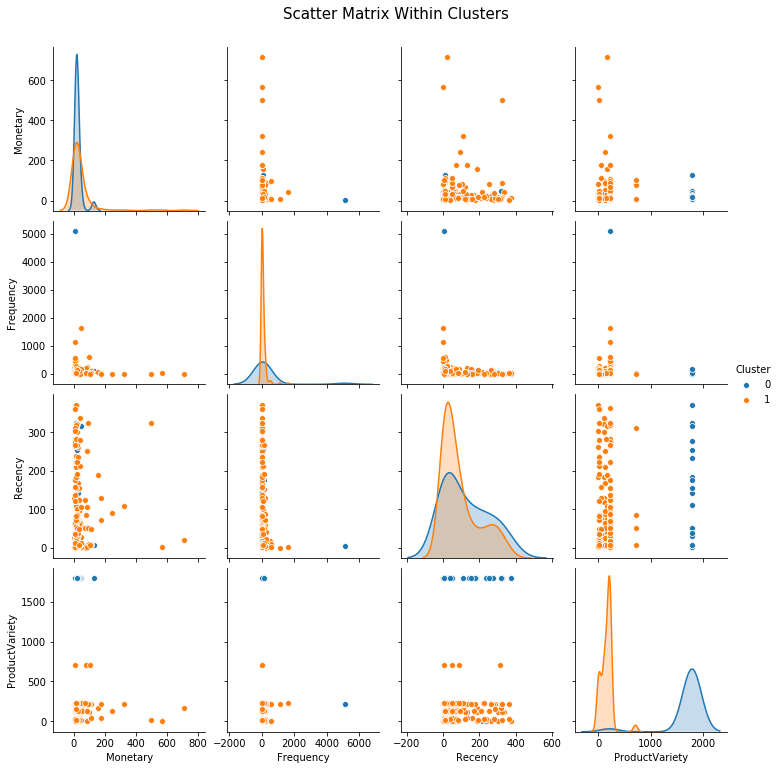

In [61]:
#comparison plots
sns.pairplot(Clustered.drop(columns=['CancellationRate','CustomerID']), hue='Cluster')
plt.suptitle('Scatter Matrix Within Clusters', fontsize = 15, y = 1.05)
plt.show()

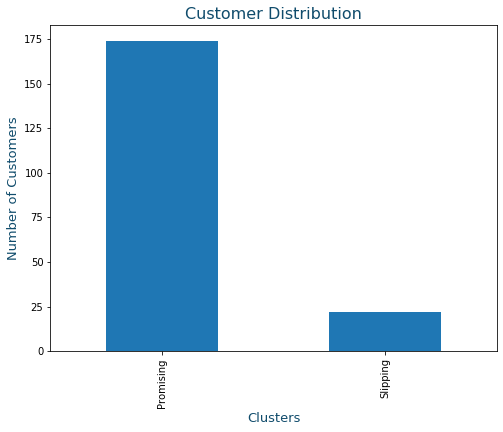

In [63]:
# Number of customers per cluster

font_title = {
        'color':  '#104C6C',
        'weight': 'normal',
        'size': 16,
        }


font_label = {
        'color':  '#104C6C',
        'weight': 'normal',
        'size': 13,
        }
plt.figure(figsize=(8,6))
ax = Clustered['Cluster'].value_counts().plot(kind='bar')
ax.set_xticklabels(['Promising','Slipping','Loyal','Outliers'])
ax.set_ylabel('Number of Customers',font_label)
ax.set_xlabel('Clusters',font_label)
ax.set_title("Customer Distribution",font_title)
plt.show()

Based on silhoutte score, cluster = 3 has the best score while elbow plot suggests clusters should be equal to 1. Running simulations for different number of clusters, I found that clusters equal to 1 or 2 are appropriate. The international customer segmentation is found lacking compared to the domestic one due to the lack of international customers in the dataset. However, running simulations for clusters = 2 helped to generate a little more extra insight in terms of cross selling opportunitues for foreign customers. So, the resulting conclusion is that for international customers, we will seperate customers into 2 categories keeping in mind both their behaviour and cross selling opportunity.

# Analysis of International Customer Segments

![<caption>](d.jpg)
